# Importing Libraries

In [23]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2


# Loading Dataset

In [24]:
df = pd.read_csv('../datasets/data_clean.csv')
df[:5]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
0,69.281049,41.371471,57.0,3,4,4,Yunusobod,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",52000
1,69.261104,41.291115,52.0,2,4,5,Yakkasaroy,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",56000
2,69.223683,41.280784,42.0,2,4,4,Chilonzor,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",37000
3,69.196862,41.290163,65.0,3,1,4,Chilonzor,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",49500
4,69.210831,41.300156,70.0,3,3,5,Chilonzor,"город Ташкент, Chilonzor район, площадь Актепа",55000


In [25]:
df.info()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lng            6708 non-null   float64
 1   lat            6708 non-null   float64
 2   maydoni        6708 non-null   float64
 3   xonalar_soni   6708 non-null   int64  
 4   kv_qavat       6708 non-null   int64  
 5   qavatlar_soni  6708 non-null   int64  
 6   tuman          6708 non-null   object 
 7   manzil         6708 non-null   object 
 8   narxi          6708 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 471.8+ KB


# Feature Engineering

In [26]:
df['maydon/xona'] = df['maydoni']/df['xonalar_soni']
df.drop('manzil', axis=1, inplace=True)

In [27]:
df['domning_turi'] = pd.cut(df['qavatlar_soni'],
                               bins=[0,5,12,16,25],
                               labels=['past','orta','balan', 'zamonaviy'])
df

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,narxi,maydon/xona,domning_turi
0,69.281049,41.371471,57.0,3,4,4,Yunusobod,52000,19.000000,past
1,69.261104,41.291115,52.0,2,4,5,Yakkasaroy,56000,26.000000,past
2,69.223683,41.280784,42.0,2,4,4,Chilonzor,37000,21.000000,past
3,69.196862,41.290163,65.0,3,1,4,Chilonzor,49500,21.666667,past
4,69.210831,41.300156,70.0,3,3,5,Chilonzor,55000,23.333333,past
...,...,...,...,...,...,...,...,...,...,...
6703,69.341907,41.292252,38.0,1,5,5,Yashnobod,24500,38.000000,past
6704,69.343485,41.289606,49.0,2,1,4,Yashnobod,32000,24.500000,past
6705,69.268901,41.331415,64.0,2,3,9,Shayhontohur,40000,32.000000,orta
6706,69.292223,41.310487,18.0,1,1,4,Mirzo Ulugbek,11000,18.000000,past


In [28]:
df=df[['lng', 'lat', 'domning_turi', 'tuman', 'qavatlar_soni', 'maydoni', 'kv_qavat', 'xonalar_soni', 'maydon/xona', 'narxi']]
df.columns = ['lng', 'lat', 'dom_turi', 'adres_tuman', 'dom_qavatlar_soni', 'kv_maydoni', 'kv_qavat', 'kv_xonalar_soni', 'maydon/xona', 'narxi']
df

,lng,lat,dom_turi,adres_tuman,dom_qavatlar_soni,kv_maydoni,kv_qavat,kv_xonalar_soni,maydon/xona,narxi
0,69.281049,41.371471,past,Yunusobod,4,57.0,4,3,19.000000,52000
1,69.261104,41.291115,past,Yakkasaroy,5,52.0,4,2,26.000000,56000
2,69.223683,41.280784,past,Chilonzor,4,42.0,4,2,21.000000,37000
3,69.196862,41.290163,past,Chilonzor,4,65.0,1,3,21.666667,49500
4,69.210831,41.300156,past,Chilonzor,5,70.0,3,3,23.333333,55000
...,...,...,...,...,...,...,...,...,...,...
6703,69.341907,41.292252,past,Yashnobod,5,38.0,5,1,38.000000,24500
6704,69.343485,41.289606,past,Yashnobod,4,49.0,1,2,24.500000,32000
6705,69.268901,41.331415,orta,Shayhontohur,9,64.0,3,2,32.000000,40000
6706,69.292223,41.310487,past,Mirzo Ulugbek,4,18.0,1,1,18.000000,11000


# EDA

In [29]:
df['dom_qavatlar_soni'].describe()

count    6708.000000
mean        6.047108
std         2.620671
min         1.000000
25%         4.000000
50%         5.000000
75%         9.000000
max        25.000000
Name: dom_qavatlar_soni, dtype: float64

In [30]:
df[df['dom_qavatlar_soni'] < 2]

,lng,lat,dom_turi,adres_tuman,dom_qavatlar_soni,kv_maydoni,kv_qavat,kv_xonalar_soni,maydon/xona,narxi
383,69.286888,41.284490,past,Mirobod,1,40.00,1,2,20.000000,23500
527,69.290070,41.293403,past,Mirobod,1,40.00,1,2,20.000000,22500
1965,69.293713,41.275891,past,Mirobod,1,40.00,1,2,20.000000,23500
2493,69.387577,41.347549,past,Mirzo Ulugbek,1,70.00,1,3,23.333333,33000
2510,69.290429,41.314320,past,Yashnobod,1,14.00,1,1,14.000000,10600
3461,69.315315,41.274580,past,Yashnobod,1,29.70,1,1,29.700000,20500
3710,69.293391,41.314662,past,Mirzo Ulugbek,1,54.00,1,3,18.000000,35500
3780,69.241563,41.216765,past,Sergeli,1,32.00,1,1,32.000000,16500
4076,69.180471,41.297892,past,Uchtepa,1,27.70,1,5,5.540000,85000
5207,69.341907,41.292252,past,Yashnobod,1,46.00,1,2,23.000000,27000


In [31]:
df.corrwith(df['narxi'], numeric_only=True).sort_values(ascending=False)

narxi                1.000000
kv_maydoni           0.810207
kv_xonalar_soni      0.564602
maydon/xona          0.349418
dom_qavatlar_soni    0.240738
lng                  0.083420
kv_qavat             0.069072
lat                  0.019077
dtype: float64

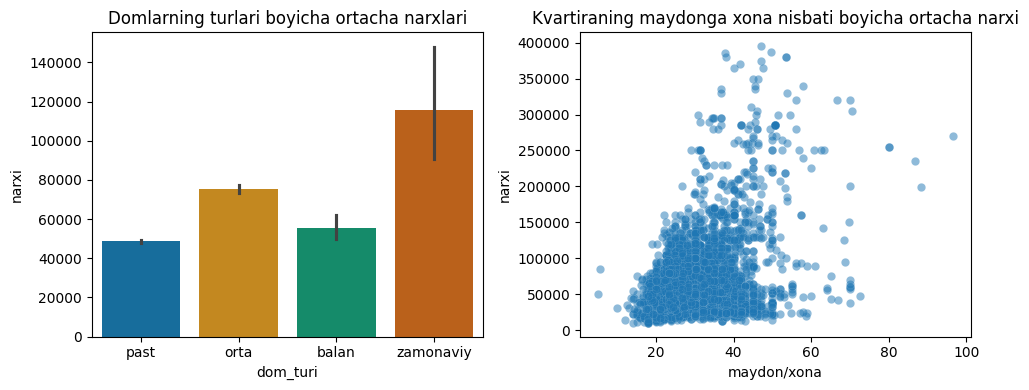

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(df, x='dom_turi', y='narxi', palette='colorblind', hue='dom_turi')
plt.title('Domlarning turlari boyicha ortacha narxlari')

plt.subplot(1,2,2)
sns.scatterplot(df, x='maydon/xona', y='narxi', alpha=.5, edgecolor='w', linewidth=0.1)
plt.title('Kvartiraning maydonga xona nisbati boyicha ortacha narxi')

plt.savefig('../figures/Domlarning va uylarning ortacha narxlari.png')
plt.tight_layout()
plt.show()

In [33]:
df[df['maydon/xona'] < 10]

,lng,lat,dom_turi,adres_tuman,dom_qavatlar_soni,kv_maydoni,kv_qavat,kv_xonalar_soni,maydon/xona,narxi
4076,69.180471,41.297892,past,Uchtepa,1,27.7,1,5,5.54,85000
6576,69.365974,41.294821,orta,Yashnobod,9,15.0,7,3,5.00,50000


# Data Export

In [34]:
df.to_csv('../datasets/modelling_data.csv', index=False)